In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("EastWestAirlines.csv")

In [3]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

# Data Preprocessing:

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
df.shape

(3999, 12)

In [6]:
columns=df.columns
columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Text(0.5, 0, 'df.columns')

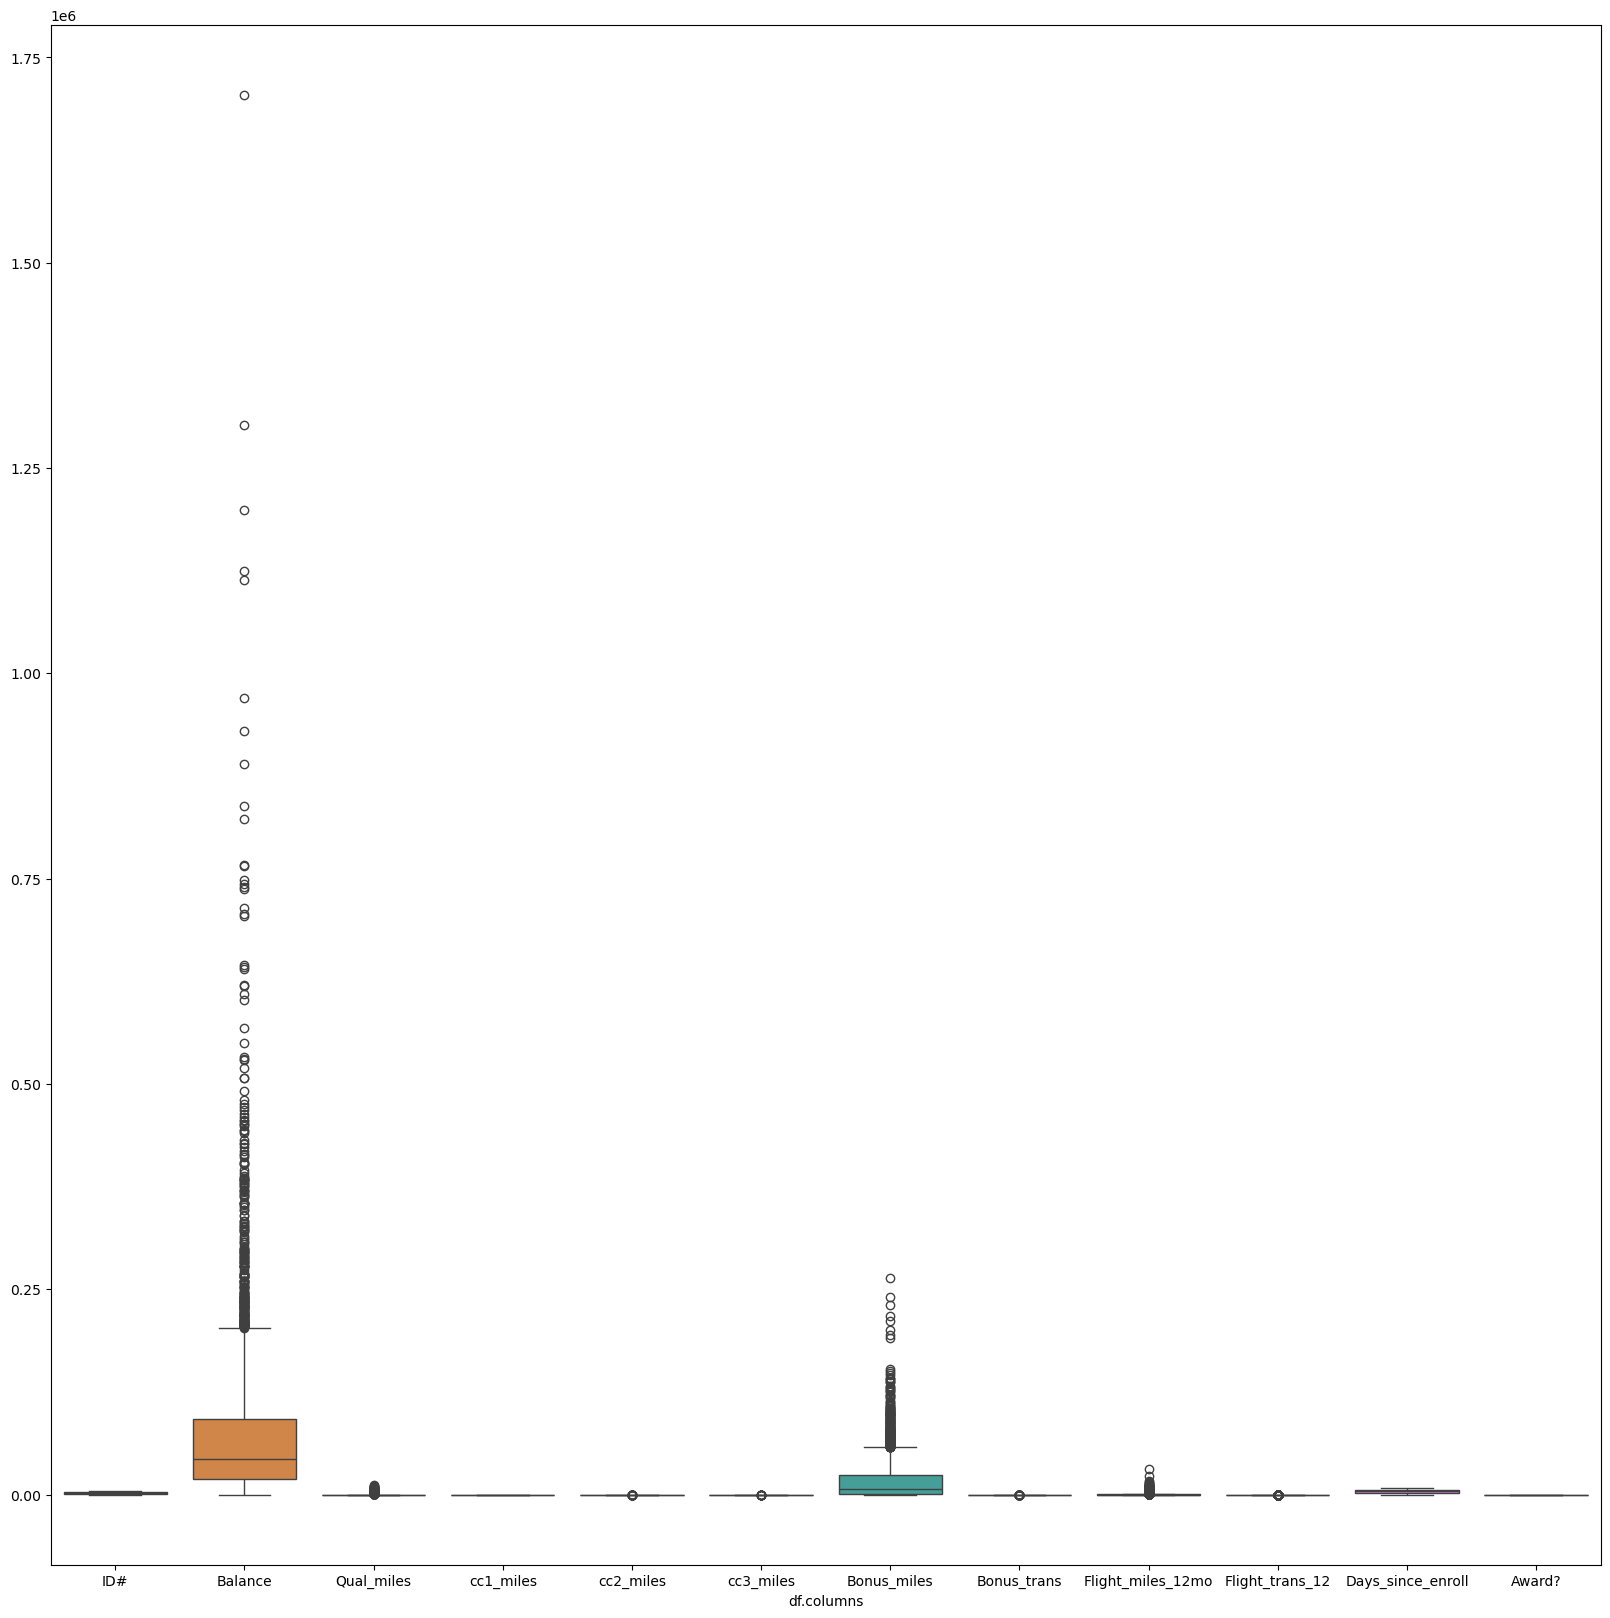

In [8]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.xlabel("df.columns")

In [9]:
import scipy.stats as stats

In [10]:
def remove_outliers_z_score(df,columns):
    thershold=2
    z_scores=stats.zscore(df[columns])
    return df[(abs(z_scores)<thershold).all(axis=1)]

In [11]:
df_new=remove_outliers_z_score(df,columns)
df_new

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3201 rows x 12 columns]

In [12]:
corr=df[columns].corr()

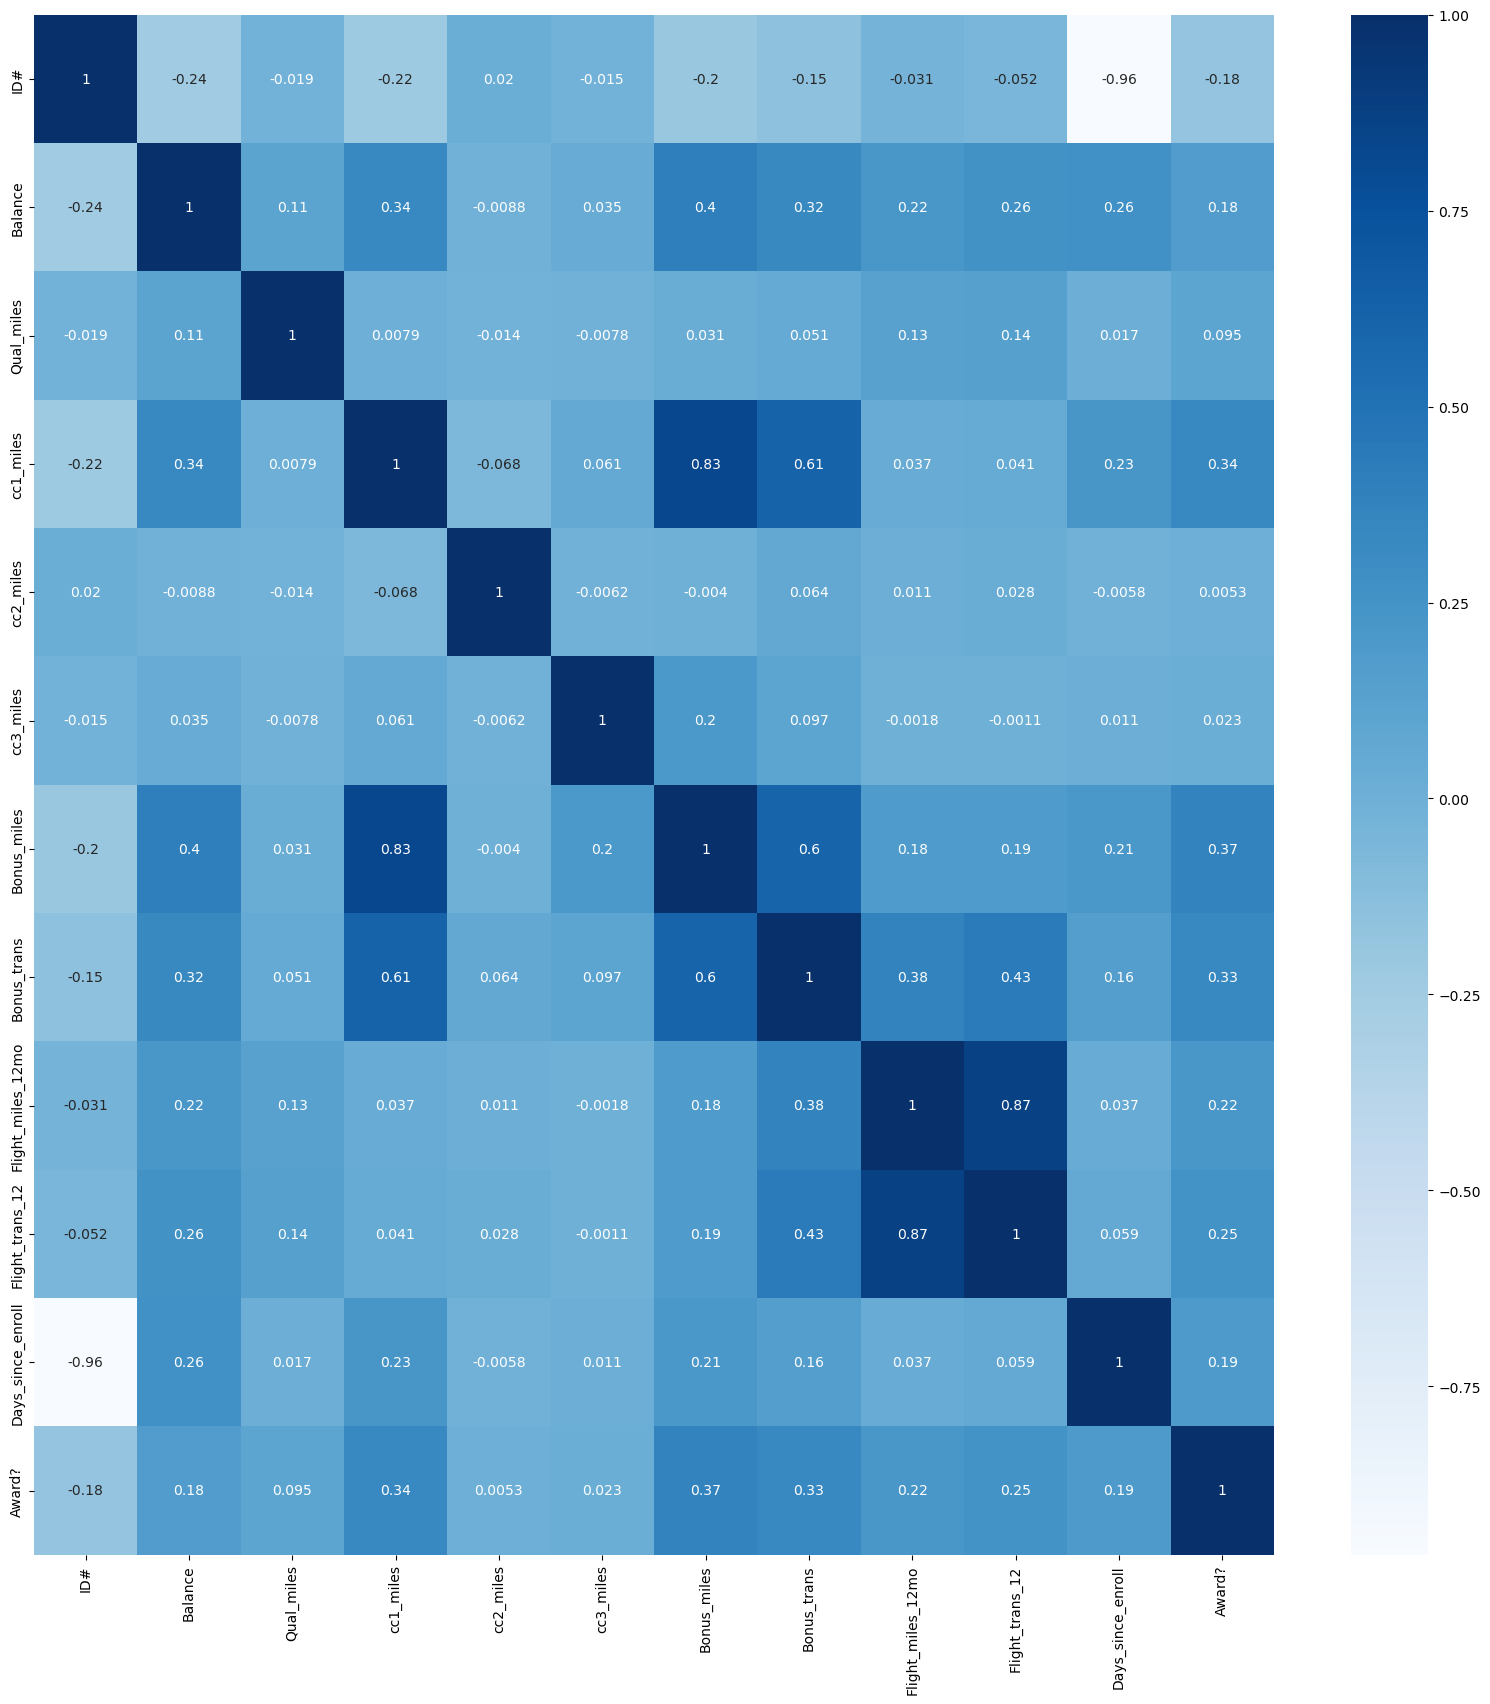

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap=plt.cm.Blues,annot=True)
plt.show()

# Implementing Clustering Algorithms:

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std_sca=StandardScaler()

In [16]:
scaled=std_sca.fit_transform(df_new)

In [17]:
scaled

array([[-1.84207797, -0.48053574, -0.12792546, ..., -0.44330127,
         1.55040081, -0.6647495 ],
       [-1.84120401, -0.6545987 , -0.12792546, ..., -0.44330127,
         1.5342953 , -0.6647495 ],
       [-1.84033006, -0.22213078, -0.12792546, ..., -0.44330127,
         1.56751291, -0.6647495 ],
       ...,
       [ 1.66946814,  0.40853694, -0.12792546, ..., -0.44330127,
        -1.26705633,  1.50432608],
       [ 1.6703421 ,  0.04280717, -0.12792546, ...,  0.32331535,
        -1.26755963, -0.6647495 ],
       [ 1.67121605, -0.97201568, -0.12792546, ..., -0.44330127,
        -1.26906952, -0.6647495 ]])

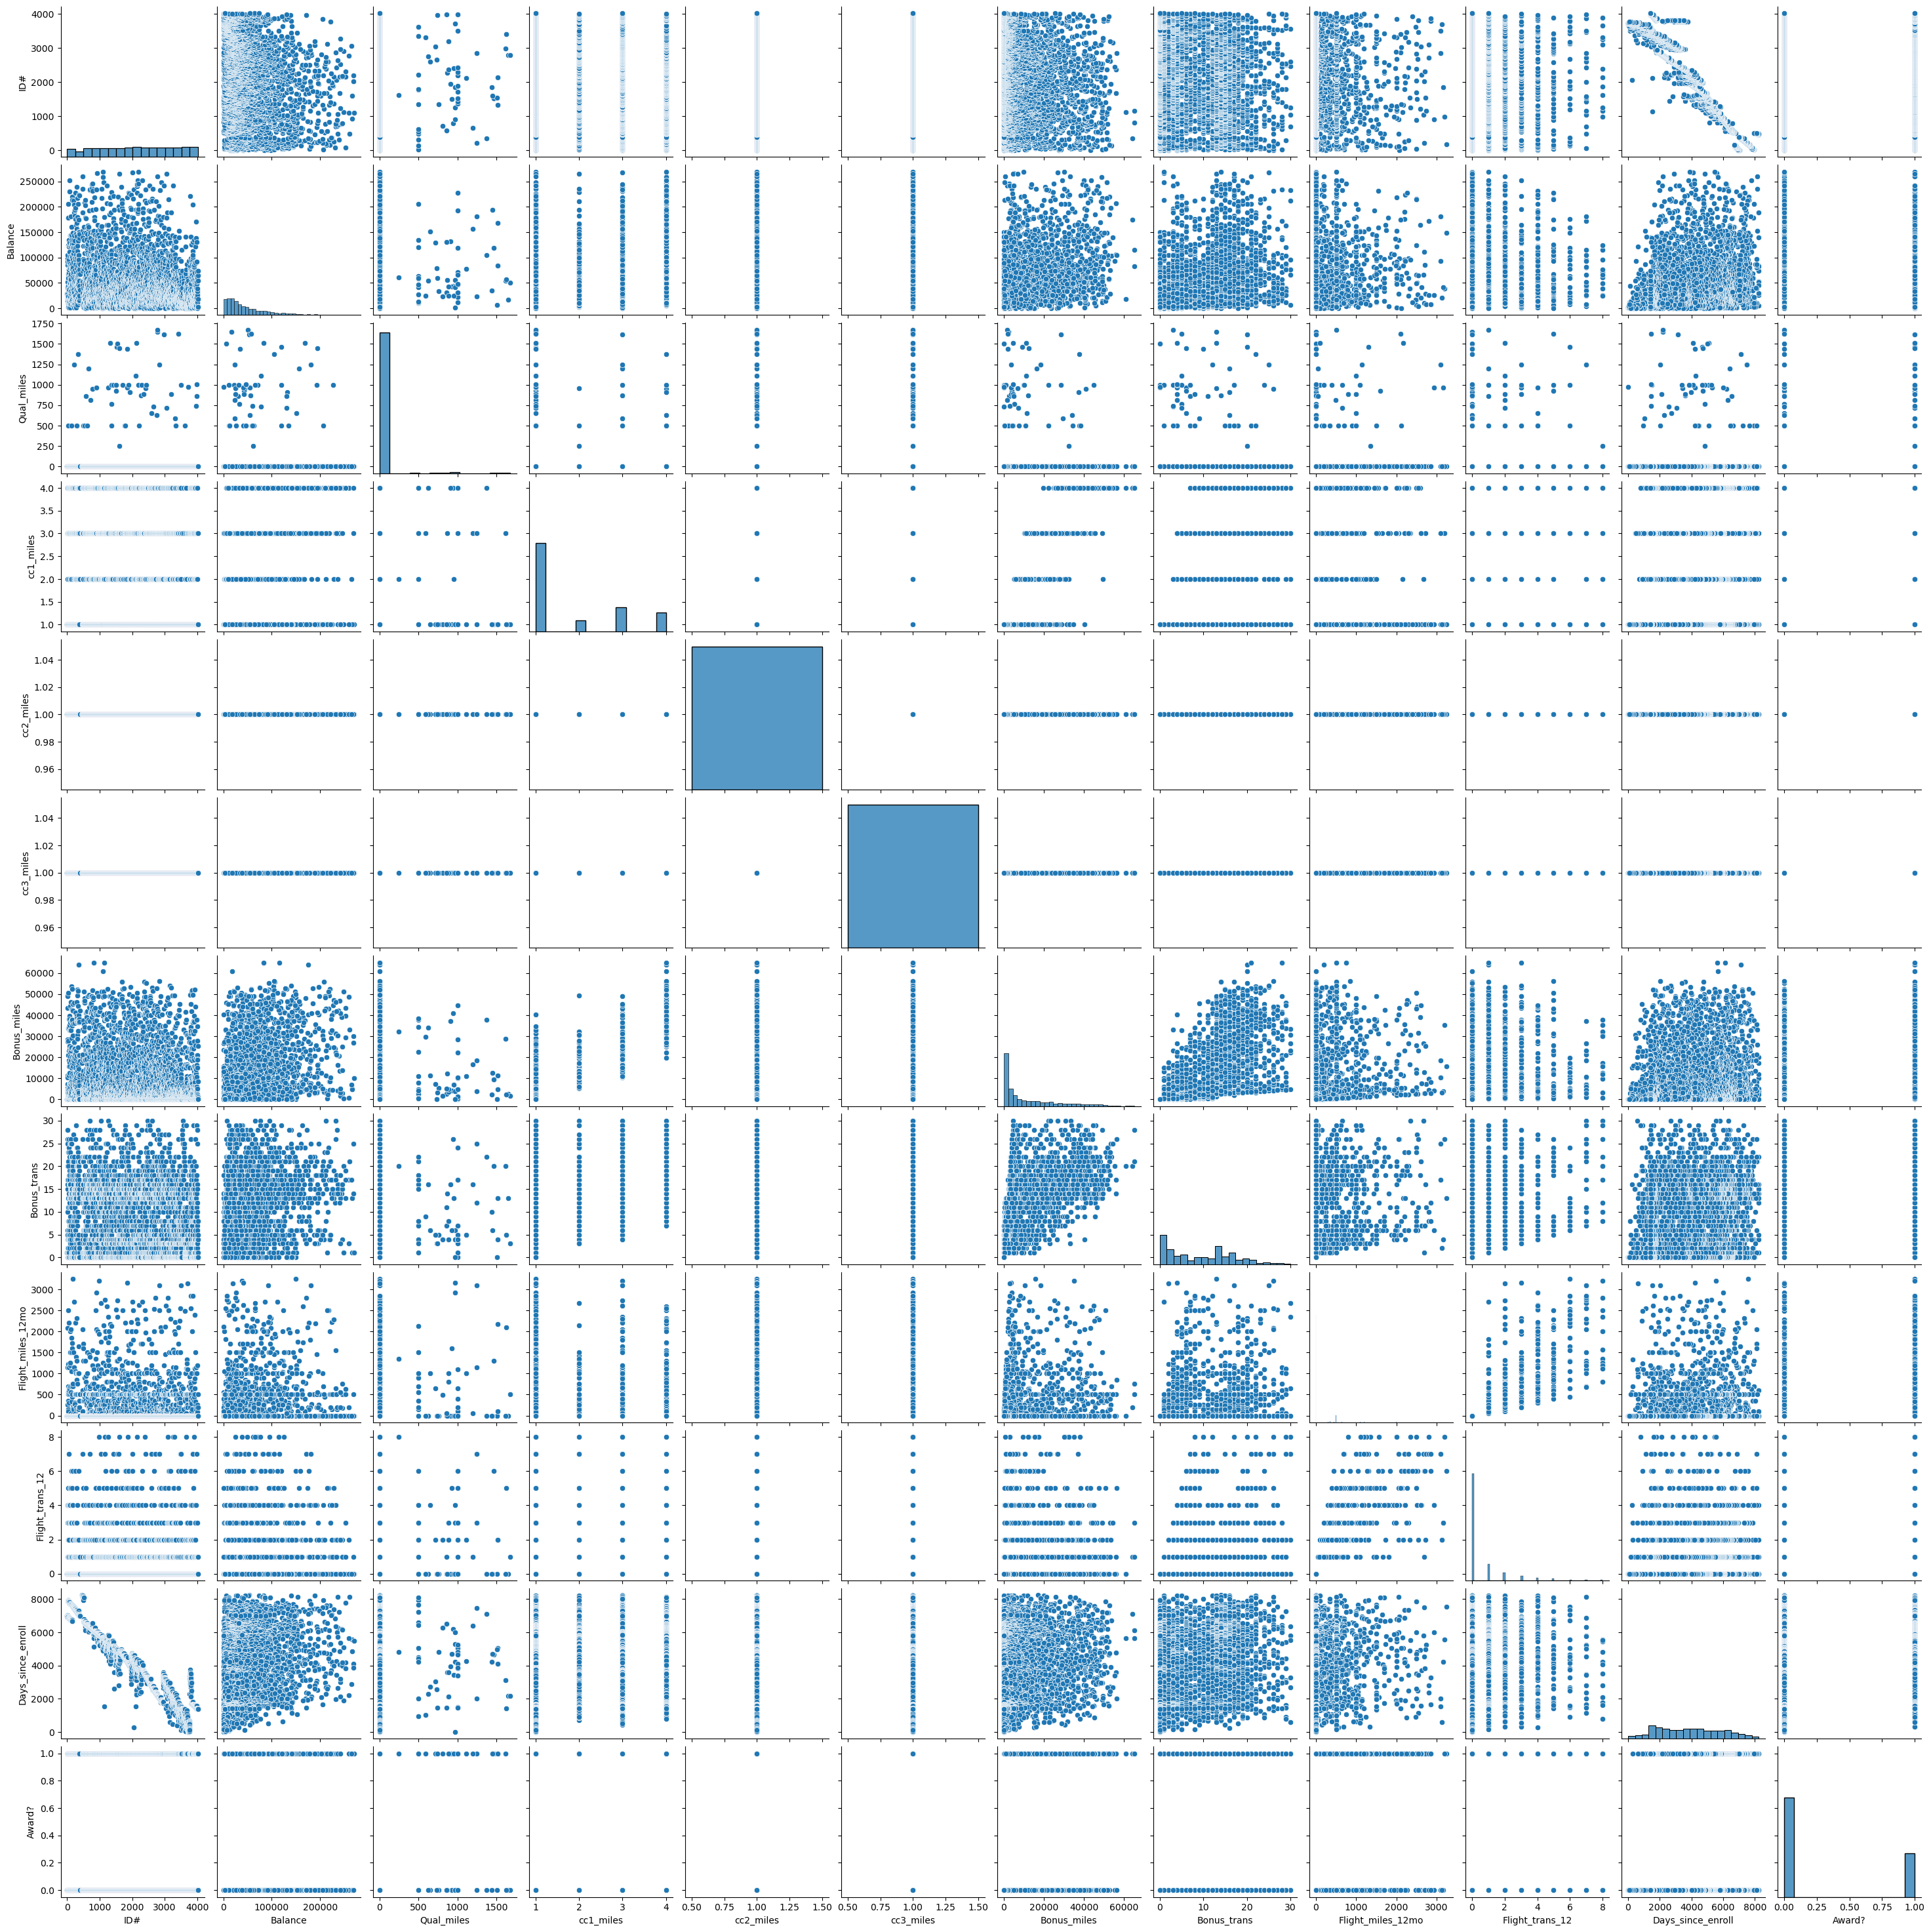

In [18]:
sns.pairplot(data=df_new)

# Cluster Analysis and Interpretation:

In [19]:
from sklearn.cluster import KMeans

In [21]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled)
    wcss.append(model.inertia_)

In [22]:
wcss

[32010.0,
 24506.63758275027,
 20534.914536635624,
 17575.255673676453,
 16457.74045255997,
 13831.592670469003,
 13379.977379991235,
 12315.331589009449,
 11903.811303967906,
 11018.634014040705]

In [32]:
model.inertia_

11018.634014040705

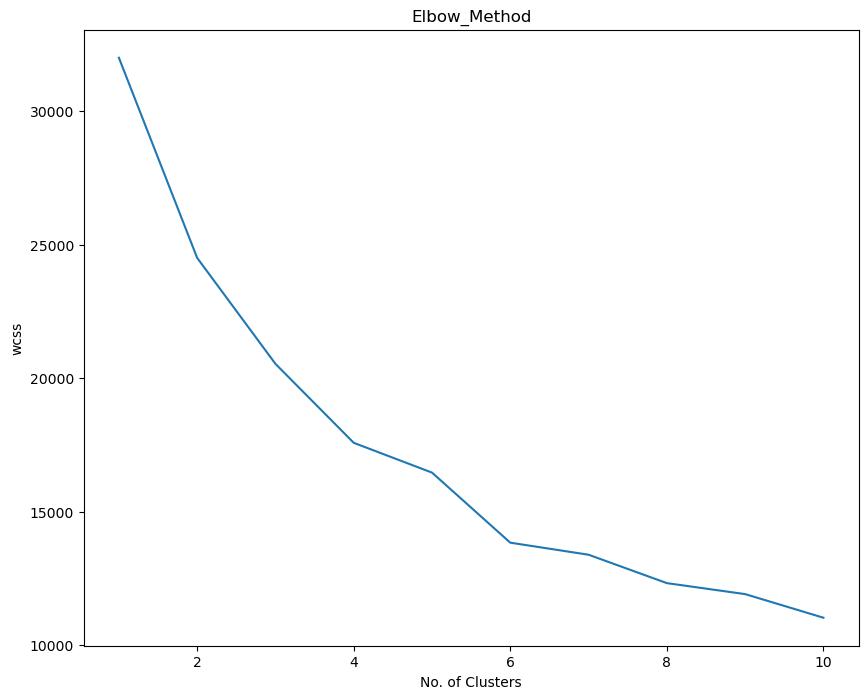

In [23]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.title('Elbow_Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
model.labels_

array([1, 1, 1, ..., 3, 8, 8])

In [25]:
df_new['label']=model.labels_
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_11784\2628294527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=model.labels_


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  label  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      0  
...      ...    ...  
3994       1      8  
3995       1      8  
3996       1      3  
3997       0      8  
3998       0      8  

[3201 rows x 13 columns]

In [26]:
df_new.groupby('label').agg(['mean'])

ID#        Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
              mean           mean         mean      mean      mean      mean   
label                                                                          
0      1576.627660  102614.914894    10.638298  3.680851       1.0       1.0   
1      1156.409657   34547.565421     0.000000  1.104361       1.0       1.0   
2      1873.135593   49696.324859     1.412429  3.474576       1.0       1.0   
3      2998.877778   60254.375000     1.388889  2.225000       1.0       1.0   
4      1221.571038  124948.773224     0.000000  3.245902       1.0       1.0   
5      1768.688272   39087.027778     4.629630  1.203704       1.0       1.0   
6      2164.396648   65259.089385     8.379888  1.061453       1.0       1.0   
7      2122.130435   73206.195652  1070.739130  1.673913       1.0       1.0   
8      3251.450199   24224.104914     0.664011  1.011952       1.0       1.0   
9      1967.168675   71466.975904     9.036145  1.373494       1.0       1.0   

        Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
               mean        mean              mean            mean   
label                                                               
0      35349.797872   20.297872       1149.797872        3.138298   
1       2607.680685    5.392523         35.542056        0.129283   
2      28770.627119   16.587571         82.033898        0.285311   
3      14361.775000   15.716667         55.038889        0.188889   
4      25875.016393   15.743169         69.713115        0.215847   
5       6061.206790    7.364198         74.108025        0.259259   
6       4125.910615    6.368715        805.720670        2.905028   
7      10895.478261    9.173913        556.673913        1.565217   
8       1804.257636    3.256308         33.051793        0.120850   
9      10998.168675   12.012048       2057.493976        5.518072   

      Days_since_enroll    Award?  
                   mean      mean  
label                              
0           4873.744681  0.734043  
1           5530.219626  0.000000  
2           4379.887006  1.000000  
3           2389.355556  0.050000  
4           5484.806011  0.114754  
5           4502.768519  1.000000  
6           3852.787709  0.424581  
7           3854.043478  0.500000  
8           1913.844622  0.035857  
9           4250.361446  0.578313

In [27]:
## hac

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
model_2 = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
model_2.fit(scaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [31]:
model_2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
df_new['labels']=model_2.labels_
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_11784\1703495778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['labels']=model_2.labels_


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  label  labels  
0          0      1       0  
1          0      1       0  
2          0      1       0  
3          0      1       0  
4          1      0       0  
...      ...    ...     ...  
3994       1      8       0  
3995       1      8       0  
3996       1      3       0  
3997       0      8       0  
3998       0      8       0  

[3201 rows x 14 columns]

In [35]:
df_new.groupby('labels').mean()

ID#       Balance   Qual_miles  cc1_miles  cc2_miles  \
labels                                                                 
0       2109.746345  52379.628099     0.556262   1.817546        1.0   
1       1859.400000  98406.266667  1435.000000   1.800000        1.0   
2       2124.075000  61595.725000   805.725000   1.550000        1.0   

        cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
labels                                                            
0             1.0  11042.174825     9.393516         179.352193   
1             1.0  13035.800000    12.400000         698.400000   
2             1.0   9077.625000     8.025000         501.300000   

        Flight_trans_12  Days_since_enroll    Award?     label  
labels                                                          
0              0.559123        3917.811825  0.303560  4.229498  
1              1.800000        4252.466667  0.466667  7.000000  
2              1.625000        3928.350000  0.475000  6.750000

In [66]:
from scipy.cluster.hierarchy import linkage, dendrogram

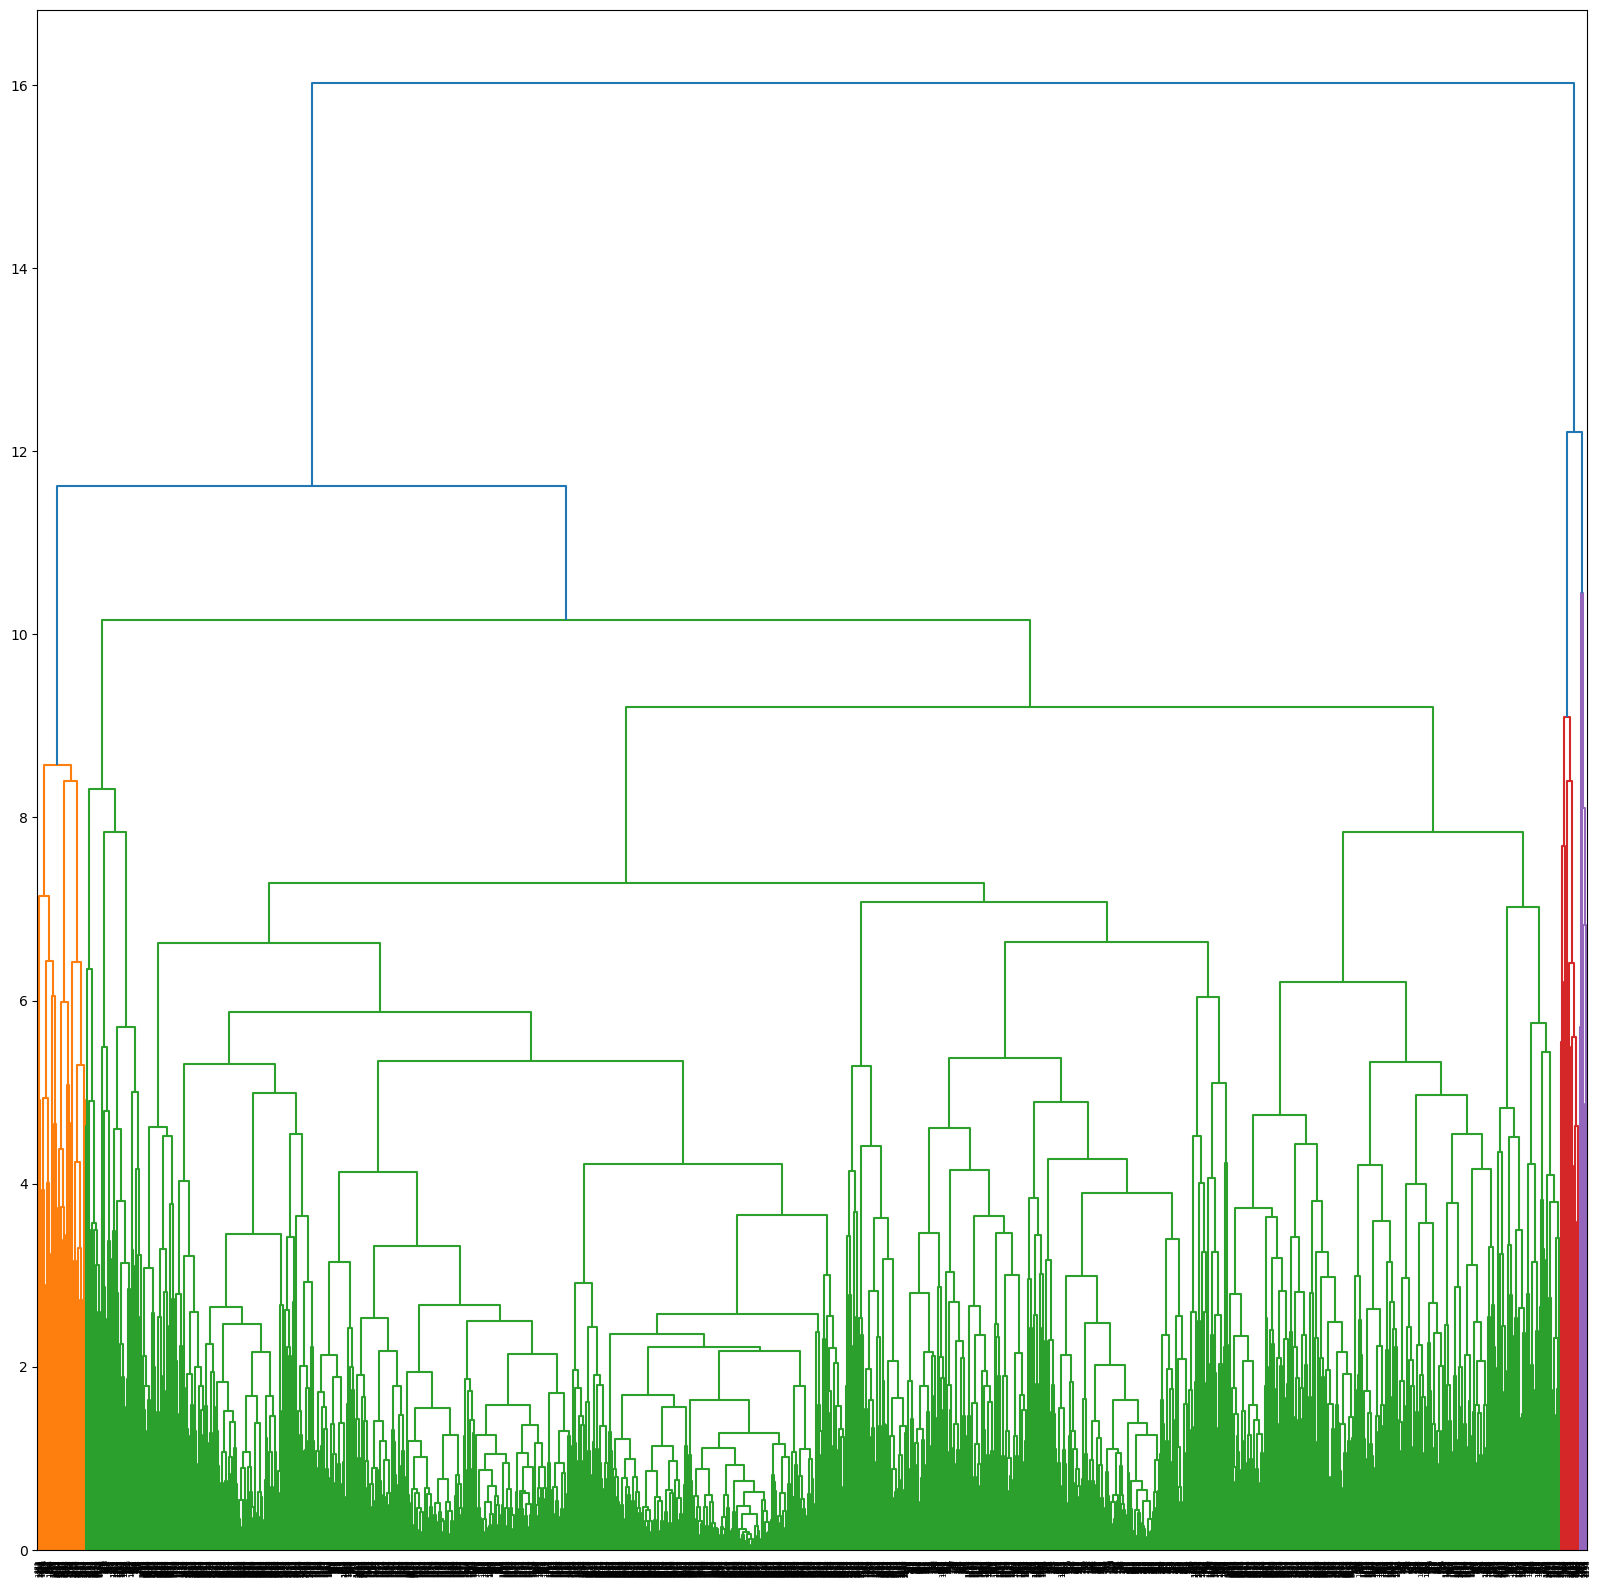

In [67]:
plt.figure(figsize=(20,20))
linked=linkage(scaled,'complete')
dn=dendrogram(linked)

In [57]:
# dbscan

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
model_3=DBSCAN(eps=0.5,min_samples=5)
model_3.fit(scaled)

DBSCAN()

In [60]:
model_3.labels_

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [61]:
df_new['clusters']=model_3.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_11784\2823713608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters']=model_3.labels_


In [62]:
df_new

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  label  labels  clusters  
0          0      1       0         0  
1          0      1       0         0  
2          0      1       0         0  
3          0      1       0         0  
4          1      0       0        -1  
...      ...    ...     ...       ...  
3994       1      8       0        -1  
3995       1      8       0        -1  
3996       1      3       0        -1  
3997       0      8       0        -1  
3998       0      8       0         0  

[3201 rows x 15 columns]

In [63]:
df_new.groupby('clusters').mean()

ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
clusters                                                                 
-1        1938.901533   75515.057783   32.726415   2.239387        1.0   
 0        2400.467450   21418.836347    0.000000   1.000000        1.0   
 1        1907.463415   24450.097561    0.000000   1.000000        1.0   
 2         281.800000    9765.200000    0.000000   2.000000        1.0   
 3         885.100000   98587.300000    0.000000   3.000000        1.0   
 4        1025.266667   24415.200000    0.000000   3.000000        1.0   
 5        1294.520000   66987.600000    0.000000   3.000000        1.0   
 6        1133.583333   31140.916667    0.000000   2.000000        1.0   
 7         890.000000   82733.400000    0.000000   4.000000        1.0   
 8        1229.444444   13901.444444    0.000000   1.000000        1.0   
 9        1234.833333  120697.833333    0.000000   3.000000        1.0   
 10       1529.400000   99450.800000    0.000000   4.000000        1.0   
 11       1850.333333   54029.666667    0.000000   4.000000        1.0   
 12       2781.633333   42027.533333    0.000000   2.000000        1.0   
 13       2113.875000   40896.000000    0.000000   4.000000        1.0   
 14       2566.233333   21578.166667    0.000000   3.000000        1.0   
 15       2356.578947   90617.052632    0.000000   3.000000        1.0   
 16       2068.000000   52065.400000    0.000000   4.000000        1.0   
 17       2857.000000   17818.266667    0.000000   1.000000        1.0   
 18       2856.142857   73353.523810    0.000000   3.000000        1.0   
 19       2907.928571   39700.642857    0.000000   3.000000        1.0   
 20       3541.083333   24126.333333    0.000000   1.000000        1.0   
 21       3542.000000   21436.200000    0.000000   1.000000        1.0   
 22       3743.600000   49543.800000    0.000000   3.000000        1.0   
 23       3899.500000    5583.833333    0.000000   1.000000        1.0   

          cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
clusters                                                            
-1              1.0  17135.566627    12.587264         347.816038   
 0              1.0   1290.402351     4.153707           0.000000   
 1              1.0   1395.268293     1.853659           0.000000   
 2              1.0   8086.000000    13.600000           0.000000   
 3              1.0  22214.800000    15.000000           0.000000   
 4              1.0  17923.233333    15.066667           0.000000   
 5              1.0  16182.180000    13.120000           0.000000   
 6              1.0   6795.166667    12.416667           0.000000   
 7              1.0  29797.600000    14.200000           0.000000   
 8              1.0   3274.722222    11.944444           0.000000   
 9              1.0  13873.000000    15.666667           0.000000   
 10             1.0  32456.600000    15.400000           0.000000   
 11             1.0  28637.500000    13.166667           0.000000   
 12             1.0   8037.266667    13.866667           0.000000   
 13             1.0  29922.000000    14.125000           0.000000   
 14             1.0  16182.733333    14.500000           0.000000   
 15             1.0  16654.842105    13.000000           0.000000   
 16             1.0  39220.400000    13.200000           0.000000   
 17             1.0    368.600000     1.533333         158.266667   
 18             1.0  20382.000000    15.095238           0.000000   
 19             1.0  13769.785714    13.642857           0.000000   
 20             1.0  16048.333333     4.916667           0.000000   
 21             1.0    500.000000     1.000000         500.000000   
 22             1.0  13444.800000    13.600000           0.000000   
 23             1.0   1741.500000     2.333333           0.000000   

          Flight_trans_12  Days_since_enroll    Award?     label    labels  
clusters                                                                    
-

# Visualization:

## for k means

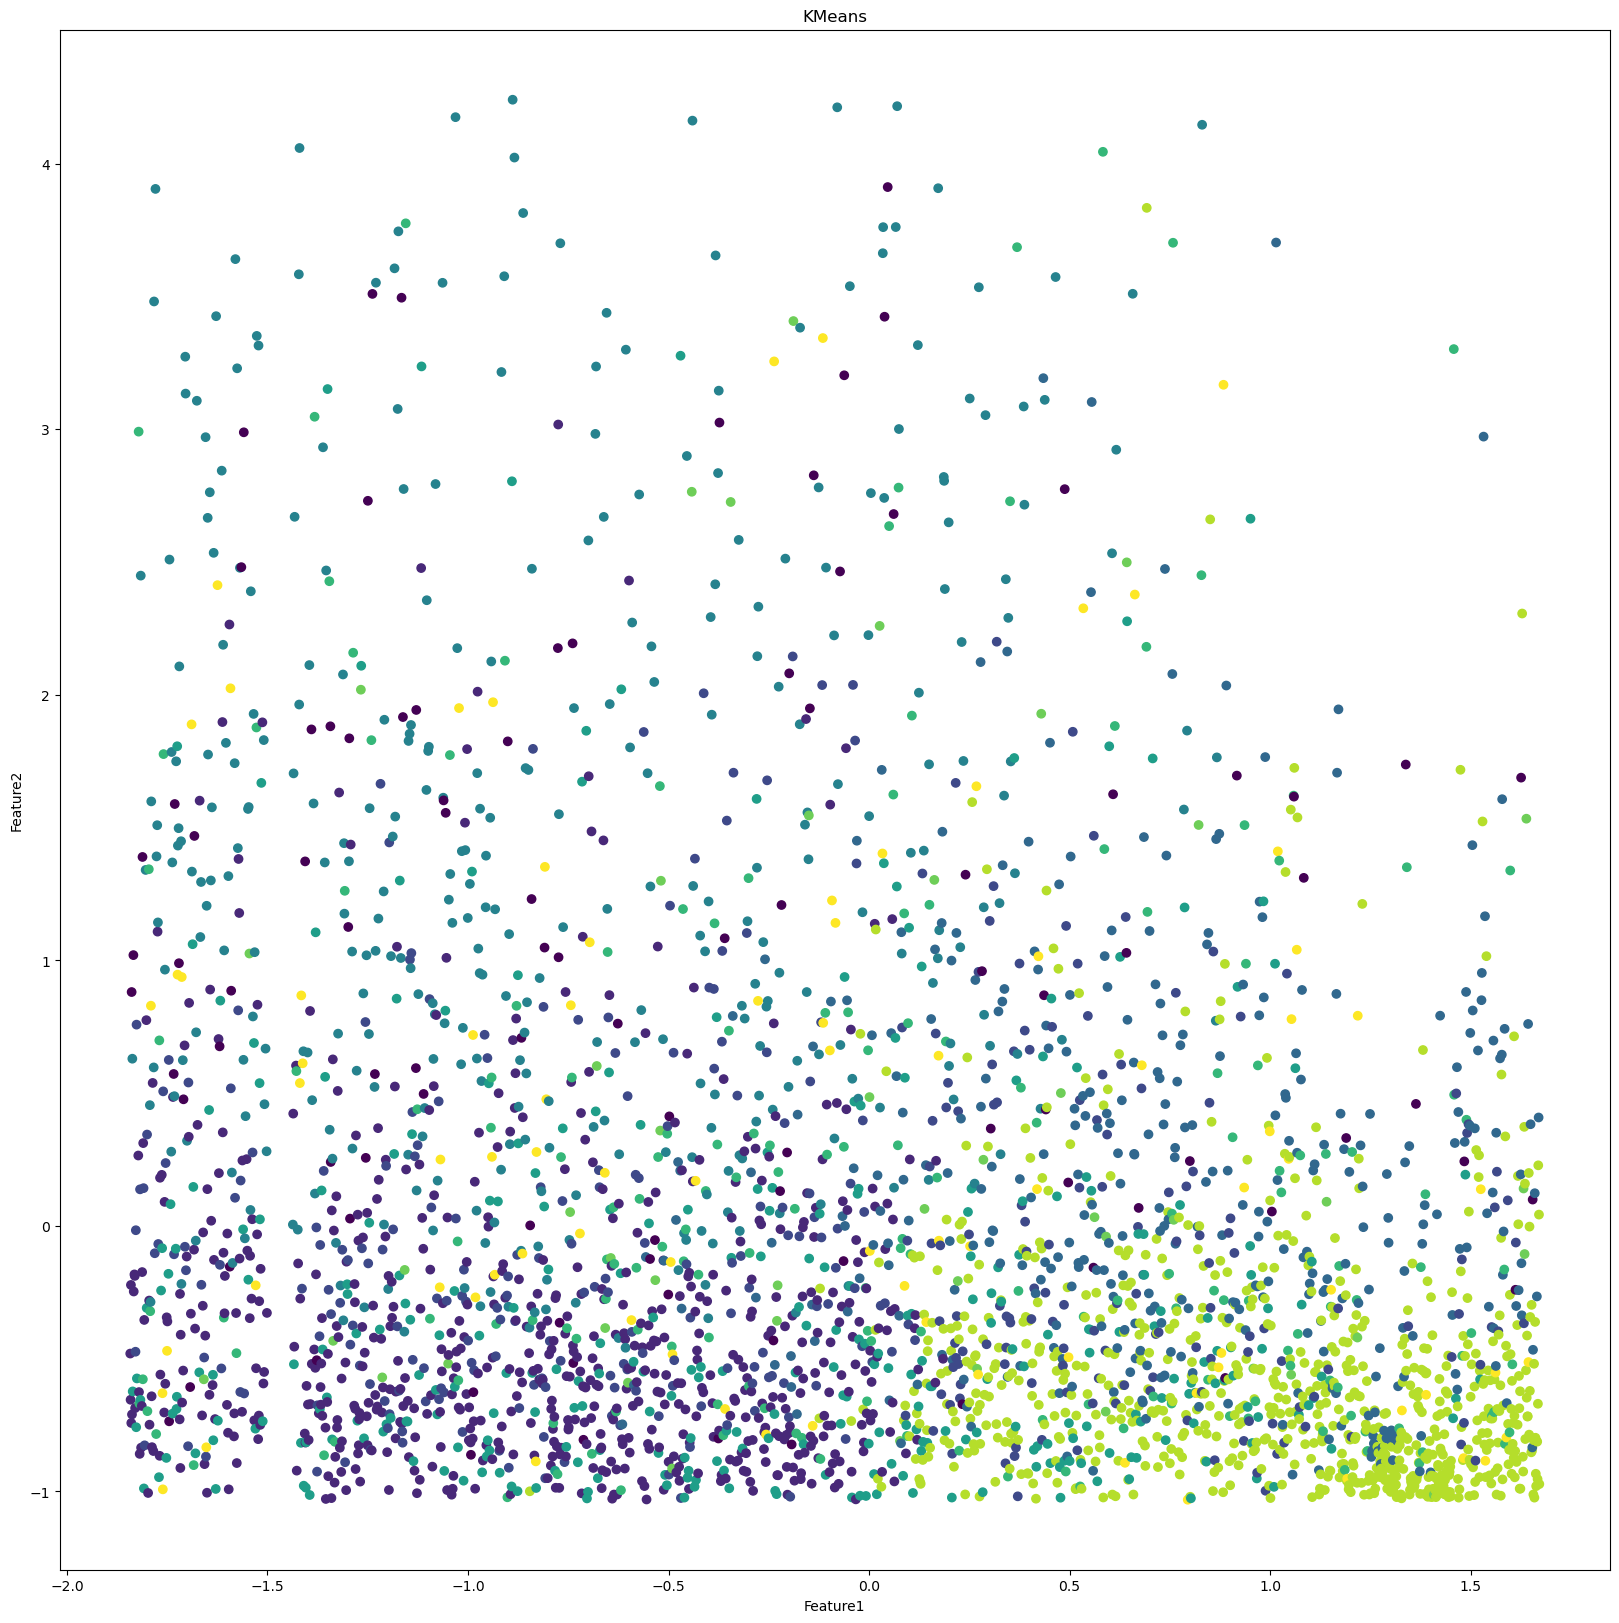

In [82]:
plt.figure(figsize=(20,20))
plt.scatter(scaled[:,0],scaled[:,1],c=model.labels_,cmap='viridis')
plt.title('KMeans')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

## hac

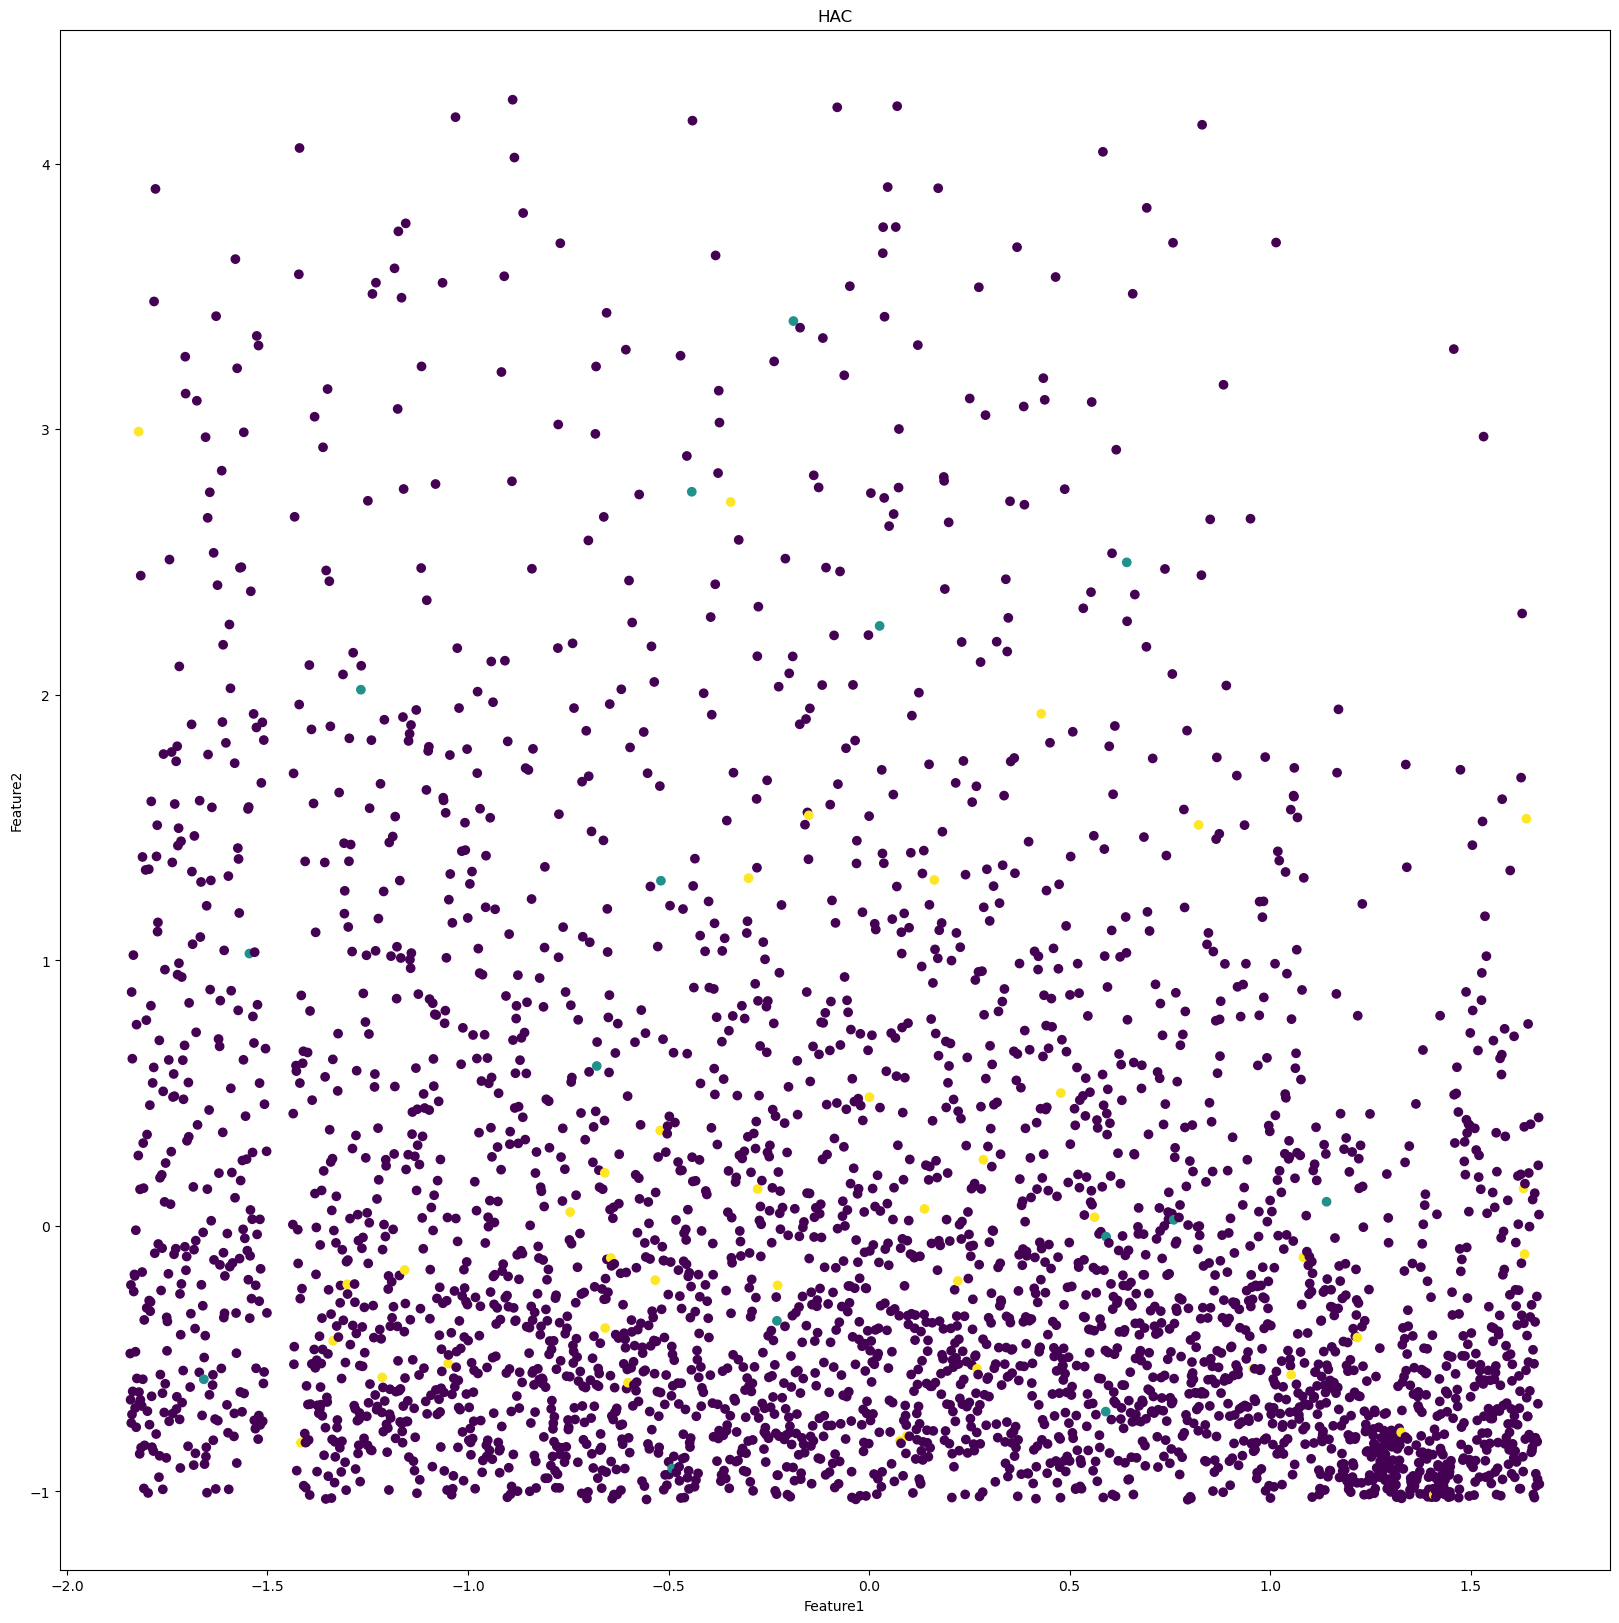

In [83]:
plt.figure(figsize=(20,20))
plt.scatter(scaled[:,0],scaled[:,1],c=model_2.labels_,cmap='viridis')
plt.title('HAC')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

## for dbscan

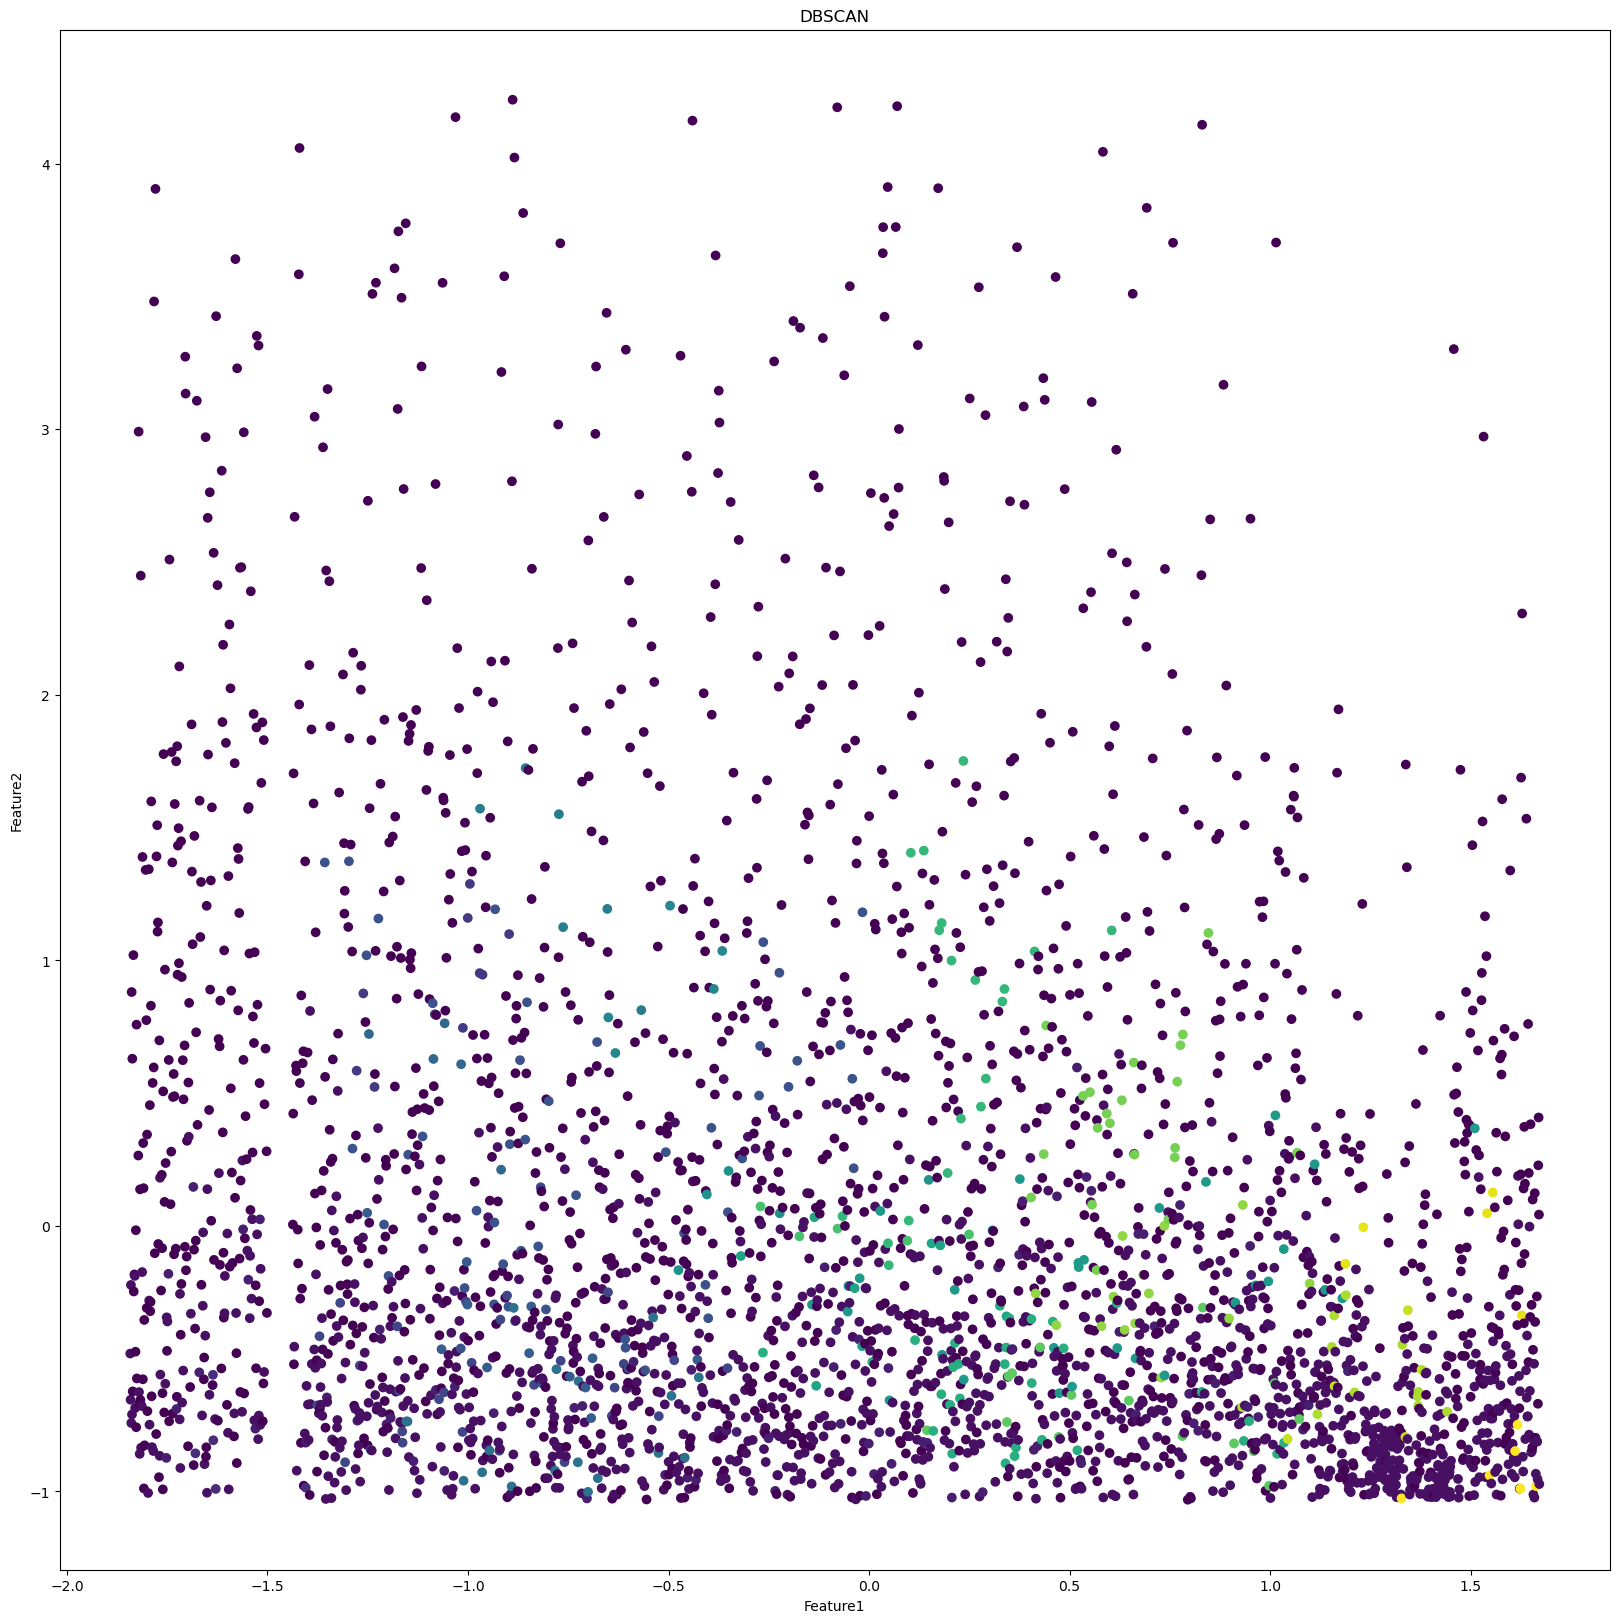

In [84]:
plt.figure(figsize=(20,20))
plt.scatter(scaled[:,0],scaled[:,1],c=model_3.labels_,cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Evaluation and Performance Metrics:

In [86]:
from sklearn.metrics import silhouette_score

## for k means

In [87]:
silhouette_score(scaled,model.labels_)

0.2607402376527194

## for hac

In [89]:
silhouette_score(scaled,model_2.labels_)

0.48020893183741203

## for dbscan

In [91]:
silhouette_score(scaled,model_3.labels_)

-0.3298910267431177

In [ ]:
## end